In [ ]:
!git clone https://github.com/saintsaintsan/Supervised-Machine-Learning.git

fatal: destination path 'Supervised-Machine-Learning' already exists and is not an empty directory.


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd


# New section

In [ ]:
%cd Supervised-Machine-Learning

/content/Supervised-Machine-Learning


In [ ]:
!ls

Classification	data  LICENSE  README.md  Regression


In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
!python Lab1_grad_des.ipynb

python3: can't open file '/content/Supervised-Machine-Learning/Lab1_grad_des.ipynb': [Errno 2] No such file or directory


In [ ]:
url = 'https://github.com/saintsaintsan/Supervised-Machine-Learning/blob/main/data/Advertising.csv#:~:text=data-,Advertising,-.csv'
df = pd.read_csv(url)
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 43, saw 66


In [ ]:
url='https://raw.githubusercontent.com/saintsaintsan/Supervised-Machine-Learning/refs/heads/main/data/Advertising.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

df=pd.read_csv('https://raw.githubusercontent.com/saintsaintsan/Supervised-Machine-Learning/refs/heads/main/data/Advertising.csv', index_col = 0)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
sel_program = 'radio'
X=df[[sel_program]]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [ ]:
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [ ]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [ ]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [ ]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])

    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.885210      0.198137  1.628603
1          1.0  0.867506      0.205661  1.590459
2          2.0  0.850156      0.213035  1.553824
3          3.0  0.833153      0.220263  1.518638
4          4.0  0.816490      0.227346  1.484845
..         ...       ...           ...       ...
259      259.0  0.004727      0.574149  0.664655
260      260.0  0.004633      0.574191  0.664654
261      261.0  0.004540      0.574231  0.664653
262      262.0  0.004449      0.574271  0.664652
263      263.0  0.004360      0.574310  0.664651

[264 rows x 4 columns]


In [ ]:
#sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [ ]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
best_parameters['value_weight']

np.float64(0.5743096317069909)

In [ ]:
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

In [ ]:
import numpy as np

y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
print(sel_program, error, get_cost(Y, y_p[sel_program]))

np.sum(((np.abs(Y- y_p[sel_program]))>0.5))

radio 0.6358628593420999 0.6646503590481072


np.int64(100)

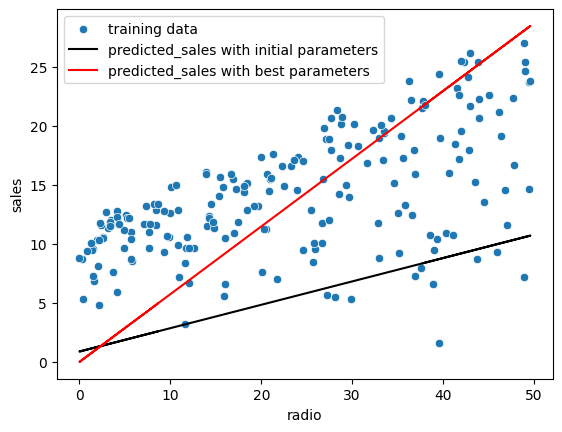

In [ ]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()